In [ ]:
#importing necessary libraries
import pandas as pd
import csv
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import networkx as nx


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Converting tsv file into csv file for importing the training data

In [ ]:

'''tsv_file_path = '/content/olid-training-v1.0.tsv'
csv_file_path = '/content/olid-training.csv'

with open(tsv_file_path, 'r', newline='', encoding='utf-8') as tsvfile:
    # Creating a CSV writer
    csv_writer = csv.writer(open(csv_file_path, 'w', newline='', encoding='utf-8'), delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    # Read each row from the TSV file and write it to the CSV file
    for row in csv.reader(tsvfile, delimiter='\t'):
        csv_writer.writerow(row)

print(f'TSV file "{tsv_file_path}" converted to CSV file "{csv_file_path}"')'''

'tsv_file_path = \'/content/olid-training-v1.0.tsv\'\ncsv_file_path = \'/content/olid-training.csv\'\n\nwith open(tsv_file_path, \'r\', newline=\'\', encoding=\'utf-8\') as tsvfile:\n    # Creating a CSV writer\n    csv_writer = csv.writer(open(csv_file_path, \'w\', newline=\'\', encoding=\'utf-8\'), delimiter=\',\', quotechar=\'"\', quoting=csv.QUOTE_MINIMAL)\n\n    # Read each row from the TSV file and write it to the CSV file\n    for row in csv.reader(tsvfile, delimiter=\'\t\'):\n        csv_writer.writerow(row)\n\nprint(f\'TSV file "{tsv_file_path}" converted to CSV file "{csv_file_path}"\')'

Dividing the training data into 3 separate csv files

In [ ]:
data = pd.read_csv("/content/olid-training.csv")
data.columns

Index(['id', 'tweet', 'subtask_a', 'subtask_b', 'subtask_c'], dtype='object')

In [ ]:
# Extract columns for the new DataFrame
subtask1_data = data[['id','tweet', 'subtask_a']]
subtask2_data = data[['id','tweet', 'subtask_b']]
subtask3_data = data[['id','tweet', 'subtask_c']]

#saving to separate csv files
subtask1_data.to_csv('file1.csv', index=False)
subtask2_data.to_csv('file2.csv', index=False)
subtask3_data.to_csv('file3.csv', index=False)


In [ ]:
data1 = pd.read_csv("/content/file1.csv")
data2 = pd.read_csv("/content/file2.csv")
data3 = pd.read_csv("/content/file3.csv")

In [ ]:
data3.columns

Index(['id', 'tweet', 'subtask_c'], dtype='object')

In [ ]:
data1['subtask_a'].value_counts()

NOT    8804
OFF    4389
Name: subtask_a, dtype: int64

In [ ]:
data2['subtask_b'].value_counts()

TIN    3868
UNT     521
Name: subtask_b, dtype: int64

In [ ]:
data3['subtask_c'].value_counts()

IND    2403
GRP    1072
OTH     393
Name: subtask_c, dtype: int64

Data is highly imbalanced

OVERALL DATA EDA

In [ ]:
#Displaying Sample Tweets
random_texts = data['tweet'].sample(n=5, random_state=42)
print(random_texts)

7443     . My God. #TheEmmys  And the limousine liberal...
8156     ******** LOESCH UNLEASHED: Dana exposes the ra...
5163     @USER Did the view just exposed crooked Hillar...
12650    @USER @USER There you go! An this is different...
9513     @USER @USER @USER come on.  Nicco had excuses ...
Name: tweet, dtype: object


In [ ]:
#checking for null values
data.isna().sum()

id              0
tweet           0
subtask_a       0
subtask_b    8804
subtask_c    9325
dtype: int64

In [ ]:
data['tweet'].duplicated().sum()

33

47 tweets are same in our dataset hence we will remove them while performing pre processing on 3 separate csv files.

In [ ]:
data['tweet'] = data['tweet'].str.lower()

In [ ]:
'''
#if we do not want to include stopwords and punctuations
# Tokenizing and counting the frequency of each token
#including only alphabetic charachters
tokens = [token.lower() for token in word_tokenize(' '.join(data['tweet'])) if token.isalpha()]
freq_dist = FreqDist(tokens)
print(freq_dist)

# Plotting the top 20 tokens
top_n = 20
plt.figure(figsize=(12, 6))
freq_dist.plot(top_n, cumulative=False)
plt.title(f'Top {top_n} Tokens in the Dataset')
plt.show()'''


"\n#if we do not want to include stopwords and punctuations\n# Tokenizing and counting the frequency of each token\n#including only alphabetic charachters\ntokens = [token.lower() for token in word_tokenize(' '.join(data['tweet'])) if token.isalpha()]\nfreq_dist = FreqDist(tokens)\nprint(freq_dist)\n\n# Plotting the top 20 tokens\ntop_n = 20\nplt.figure(figsize=(12, 6))\nfreq_dist.plot(top_n, cumulative=False)\nplt.title(f'Top {top_n} Tokens in the Dataset')\nplt.show()"

<FreqDist with 21461 samples and 374455 outcomes>


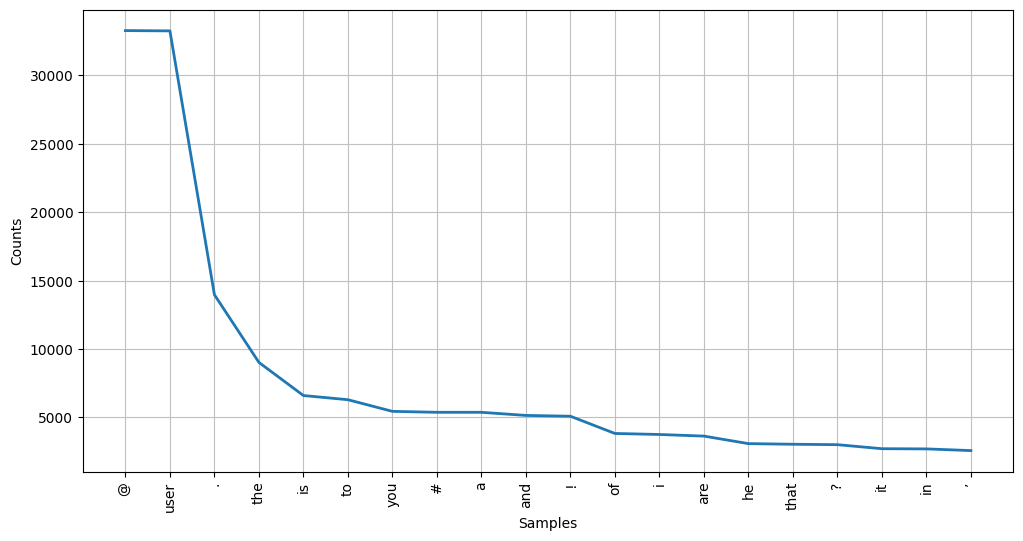

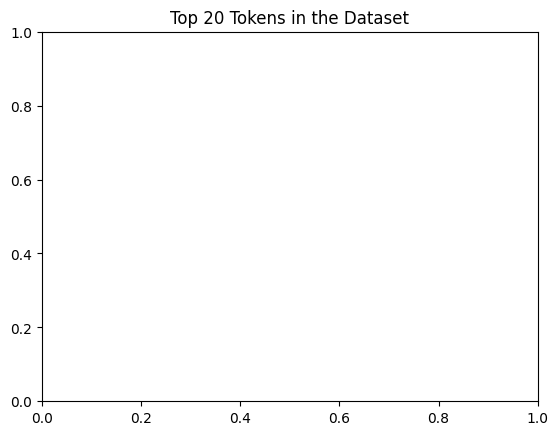

In [ ]:
#WORD FREQUENCY
# Tokenizing and counting the frequency of each token
tokens = [token.lower() for token in word_tokenize(' '.join(data['tweet']))] #combines entire data in tweet column and then creates tokens
freq_dist = FreqDist(tokens)
print(freq_dist)

# Plotting the top 20 tokens
top_n = 20
plt.figure(figsize=(12, 6))
freq_dist.plot(top_n, cumulative=False)
plt.title(f'Top {top_n} Tokens in the Dataset')
plt.show()

Top 20 tokens include stopwords and punctuation marks. Hence we need to remove them

Total Vocabulary Size: 21461


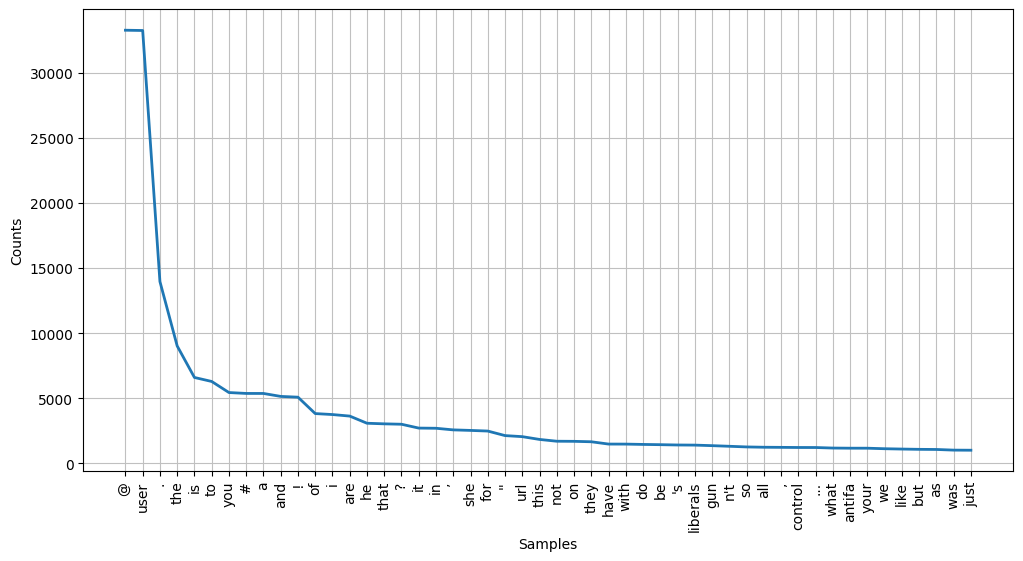

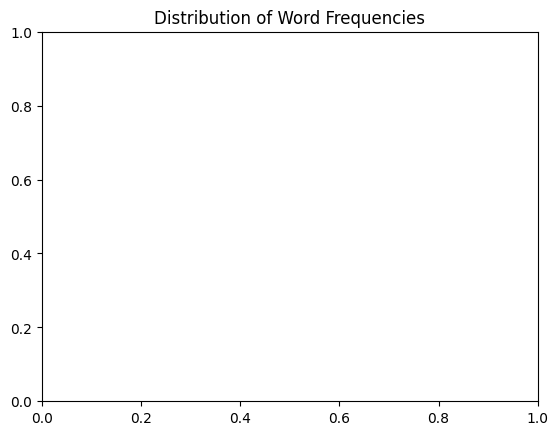

In [ ]:
#VOCUBLARY SIZE
#calculating total number of unique size of our dataset to know the vocublary size
unique_words = set(tokens)
vocabulary_size = len(unique_words)

print(f'Total Vocabulary Size: {vocabulary_size}')

plt.figure(figsize=(12, 6))
freq_dist.plot(50, cumulative=False)
plt.title('Distribution of Word Frequencies')
plt.show()

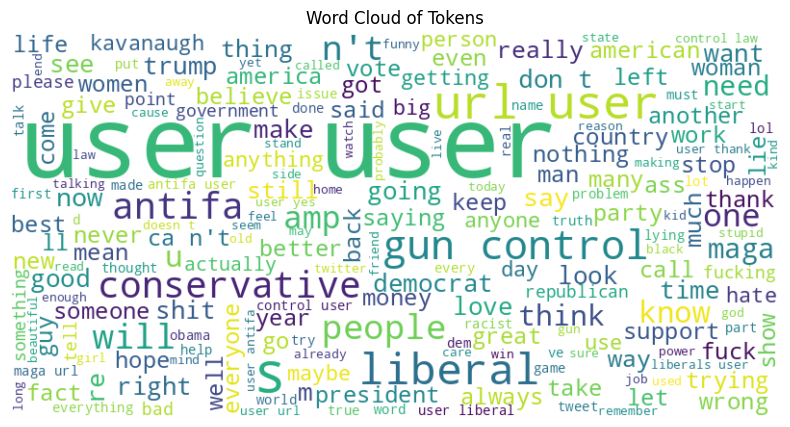

In [ ]:
#creating word cloud
text = ' '.join(tokens) #This step creates a single text string from the tokens, which is necessary input for generating the word cloud.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokens')
plt.show()

VISUALIZING VALUE COUNTS OF EACH SUBTASK

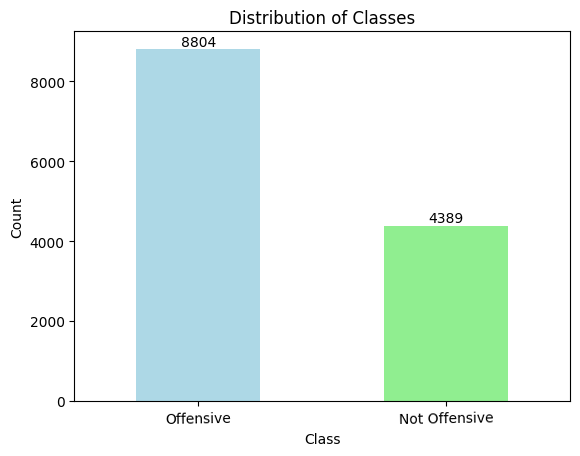

In [ ]:
#Subtask 1
fig = data1['subtask_a'].value_counts().plot(kind='bar', color=["lightblue", 'lightgreen'])
# Adding count annotations to each bar
for i, count in enumerate(data1['subtask_a'].value_counts()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')
# Labeling and displaying the plot
fig.set_xticklabels(labels=['Offensive', "Not Offensive"], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

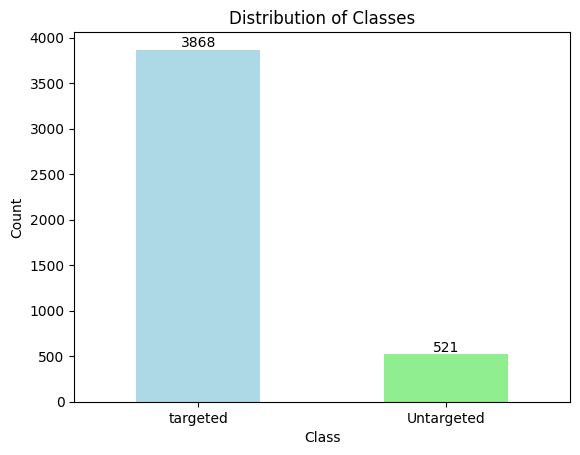

In [ ]:
#subatk 2

fig = data2['subtask_b'].value_counts().plot(kind='bar', color=["lightblue", 'lightgreen'])
# Adding count annotations to each bar
for i, count in enumerate(data2['subtask_b'].value_counts()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')
# Labeling and displaying the plot
fig.set_xticklabels(labels=['targeted', "Untargeted"], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()



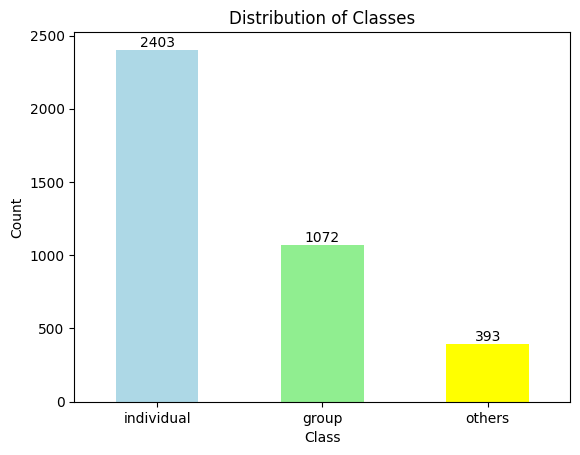

In [ ]:
#subtask 3
fig = data3['subtask_c'].value_counts().plot(kind='bar', color=["lightblue", 'lightgreen', "yellow"])
# Adding count annotations to each bar
for i, count in enumerate(data3['subtask_c'].value_counts()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')
# Labeling and displaying the plot
fig.set_xticklabels(labels=['individual', "group","others"], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [ ]:
#removing user
word_to_remove = '@USER'
# Function to remove a specific word from the text
def remove_specific_word(text, word_to_remove):
    return ' '.join([word for word in text.split() if word.lower() != word_to_remove.lower()])
# Apply the function to your dataset
data['tweet'] = data['tweet'].apply(lambda x: remove_specific_word(x, word_to_remove))
# Display the modified dataset
print(data)

          id                                              tweet subtask_a  \
0      86426  she should ask a few native americans what the...       OFF   
1      90194  go home you’re drunk!!! #maga #trump2020 👊🇺🇸👊 url       OFF   
2      16820  amazon is investigating chinese employees who ...       NOT   
3      62688  someone should'vetaken" this piece of shit to ...       OFF   
4      43605  obama wanted liberals &amp; illegals to move i...       NOT   
...      ...                                                ...       ...   
13188  94475  every antifa member is just several midget gyp...       NOT   
13189  34150          berkeley antifa do not agree with you url       NOT   
13190  83400              you are a great model for inspiration       NOT   
13191  84081  chris, chris, chris.... are you forgetting the...       OFF   
13192  11244  advocate for gun control while breaking the cu...       NOT   

      subtask_b subtask_c  
0           UNT       NaN  
1           TIN    

In [ ]:
#bigram
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt


text_data = ' '.join(data['tweet'])

# Function to generate n-grams
def generate_ngrams(text, n):
    # Tokenizing the text
    tokens = text.split()
    # Generating n-grams
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Defining the value of 'n' for n-grams
n = 2

# Generate n-grams from the text data
n_grams = generate_ngrams(text_data, n)

# Counting the frequency of each n-gram
n_gram_freq = Counter(n_grams)

n_gram_freq

In [ ]:
sorted_n_gram_freq = dict(n_gram_freq.most_common())
# Displaying the sorted n-gram frequencies
for n_gram, frequency in list(sorted_n_gram_freq.items())[:10]:
    print(f'{n_gram}: {frequency}')

you are: 1508
he is: 1417
she is: 1346
gun control: 810
is a: 807
of the: 665
in the: 562
to be: 400
is the: 374
this is: 359


In [ ]:
# Generate tri grams from the text data
n_grams = generate_ngrams(text_data, 3)

# Count the frequency of each n-gram
n_gram_freq_3 = Counter(n_grams)
sorted_n_gram_freq = dict(n_gram_freq_3.most_common())
# Display the sorted n-gram frequencies
for n_gram, frequency in list(sorted_n_gram_freq.items())[:10]:
    print(f'{n_gram}: {frequency}')


she is a: 213
he is a: 204
you are a: 143
you are the: 85
he is the: 82
gun control laws: 77
you are so: 74
she is the: 71
you are not: 67
he is not: 66


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Sample tweet data (replace with your actual tweet data)
tweet = "This is a sample tweet for part-of-speech tagging."

# Tokenize the tweet into words
tokens = word_tokenize(tweet)

# Perform part-of-speech tagging
pos_tags = pos_tag(tokens)

# Print the part-of-speech tags
print(pos_tags)

In [ ]:
'''from transformers import pipeline

# Load the NER pipeline
ner_pipeline = pipeline("ner", framework="pt")

# Sample text for NER
text = "Apple's latest product, the iPhone 13, received mixed reviews from customers."

# Perform NER on the text
ner_results = ner_pipeline(text)

# Print named entities and their labels
for result in ner_results:
    print(f"Entity: {result['word']}, Label: {result['entity']}")

In [ ]:
'''import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag, StanfordNERTagger

# Download the NLTK models and corpora (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Sample text for named entity recognition
text = "Apple's latest product, the iPhone 13, received mixed reviews from customers."

# Tokenize the text
tokens = word_tokenize(text)

# Perform part-of-speech tagging
pos_tags = pos_tag(tokens)

# Perform named entity recognition using NLTK's built-in chunker
ner_chunks = nltk.ne_chunk(pos_tags)

# Extract named entities and their labels
named_entities = []
for chunk in ner_chunks:
    if hasattr(chunk, 'label'):
        named_entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))

# Print named entities and their labels
for entity, label in named_entities:
    print(f"Entity: {label}, Label: {entity}")


In [ ]:
def plot_pos_tag_distribution(text_column):
    # Tokenize and tag POS for each text
    pos_tags = []
    for text in text_column:
        words = nltk.word_tokenize(text)
        pos_tags.extend(nltk.pos_tag(words))
    # Extract POS tags and create a DataFrame
    pos_df = pd.DataFrame(pos_tags, columns=['Word', 'POS'])
    # Plot POS tag distribution
    plt.figure(figsize=(20, 6))
    sns.countplot(x='POS', data=pos_df, palette='viridis')
    plt.title('POS Tag Distribution')
    plt.xlabel('POS Tags')
    plt.ylabel('Count')
    plt.show()


<ipython-input-41-aa6318962733>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='POS', data=pos_df, palette='viridis')


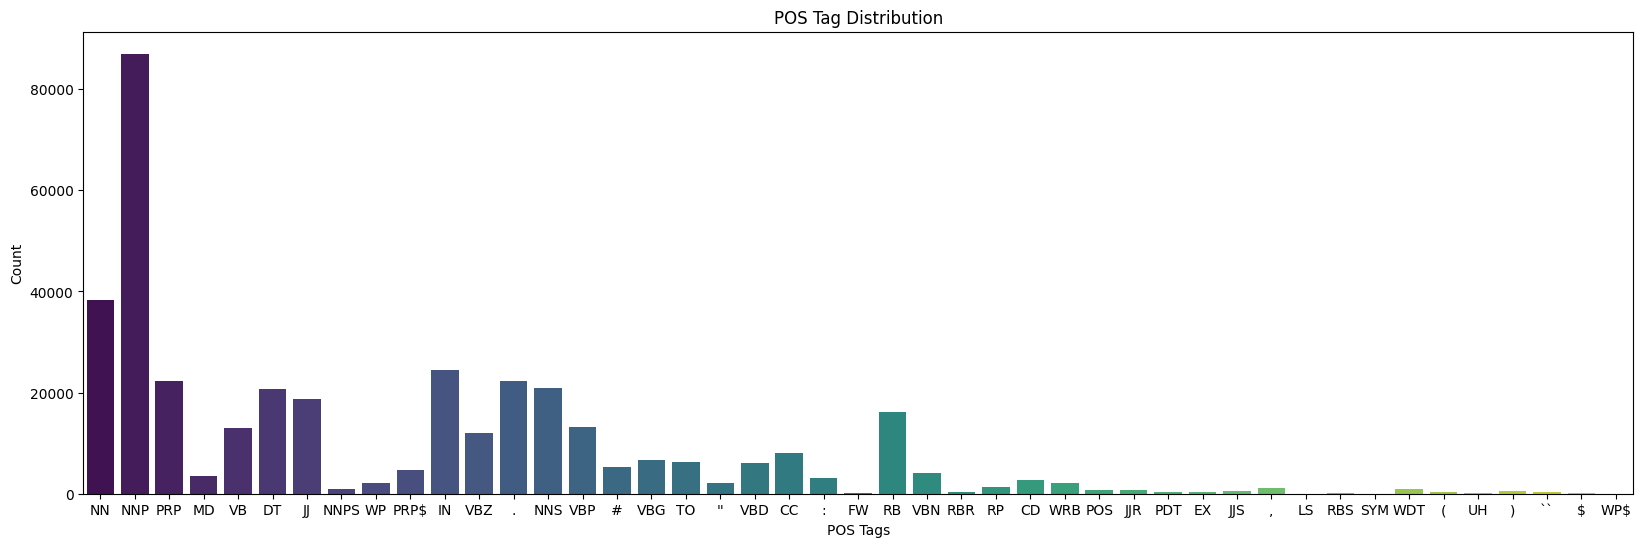

In [ ]:
plot_pos_tag_distribution(data['tweet'])

In [ ]:
import spacy


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#name entity recognition
def apply_ner_to_column(text_column):
    # Process each text with spaCy NLP pipeline
    for text in text_column:
        doc = nlp(text)
        # Extract named entities and their labels
        named_entities = [(ent.text, ent.label_) for ent in doc.ents]
        # Print named entities and their labels for each text
        print(f"Text: {text}")
        for entity, label in named_entities:
            print(f"  Entity: {entity}, Label: {label}")
        print("="*40)
# Apply the function to your dataset
apply_ner_to_column(data['tweet'])

DATA PRE PROCESSING

In [ ]:
#Text Lowercasing
data['tweet'] = data['tweet'].str.lower()

In [ ]:
#Removing Special Charachters and Punctuation

def clean_tweets(data):

    punctuations = string.punctuation

    data.loc[:, 'tweet'] = data.tweet.str.replace('@USER', '') #Remove mentions (@USER)
    data.loc[:, 'tweet'] = data.tweet.str.replace('URL', '') #Remove URLs
    data.loc[:, 'tweet'] = data.tweet.str.replace('&amp', 'and') #Replace ampersand (&) with and
    data.loc[:, 'tweet'] = data.tweet.str.replace('&lt','') #Remove &lt
    data.loc[:, 'tweet'] = data.tweet.str.replace('&gt','') #Remove &gt
    data.loc[:, 'tweet'] = data.tweet.str.replace('\d+','') #Remove numbers
    data.loc[:, 'tweet'] = data.tweet.str.lower() #Lowercase

    #Remove punctuations
    for punctuation in punctuations:
        data.loc[:, 'tweet'] = data.tweet.str.replace(punctuation, '')

    data.loc[:, 'tweet'] = data.astype(str).apply(
        lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')
    )
    #Remove emojis
    data.loc[:, 'tweet'] = data.tweet.str.strip() #Trim leading and trailing whitespaces




In [ ]:
clean_tweets(data['tweet'])

AttributeError: 'Series' object has no attribute 'tweet'

In [ ]:
pip install spellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966498 sha256=e6e39f0e2a4194eb9da6faac79cb59a83bc56398e6b92c9ddab07c3c77730e56
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7122 sha256=67d36abd850b48424667ece14ded70edce4c254bfee07b321f41113f23c64b57
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8465 sha256=b9c12ca7d5bdeb11255921d83875e602f0bac2042bc5fd535f91bca10a0a64ae
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c7

In [ ]:
from spellchecker import SpellChecker

# Initialize the spell checker
spell = SpellChecker()

# Sample text with misspelled words
text = "Ths is a smple sentence wth sme misspeled wrds."

# Tokenize the text
tokens = text.split()

# Check and correct spelling for each token
corrected_tokens = []
for token in tokens:
    # Check if the word is misspelled
    if spell.unknown([token]):
        # Get the most likely correction
        corrected_token = spell.correction(token)
        corrected_tokens.append(corrected_token)
    else:
        corrected_tokens.append(token)

# Join the corrected tokens back into a sentence
corrected_text = ' '.join(corrected_tokens)
print("Corrected text:", corrected_text)


ModuleNotFoundError: No module named 'spellchecker'